In [2]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

In [3]:
# Function for picking up points and finding their epipolar lines, on the images
def selectPointsAndfindEpipolarLines(imageL,imageR,F):
    points_L = []
    points_R = []

    mid_point_1 = (imageL.shape[0]//2,imageL.shape[1]//2)
    mid_point_2 = (imageR.shape[0]//2,imageR.shape[1]//2)

    points_L = [[mid_point_1[0],i,1] for i in range(1,imageL.shape[1],20)]
    points_R = [[mid_point_2[0],i,1] for i in range(1,imageR.shape[1],20)]

    lines_L = np.array([ np.dot(F,i) for i in points_R])
    lines_R = np.array([ np.dot(F.transpose(),i) for i in points_L])

    return points_L,points_R,lines_L,lines_R

# Function for drawing Epipolar Lines on images
def drawPointsAndEpipolarLines(pts_1,pts_2,imageL,lines_L,imageR,lines_R):

    output_imageL_points = imageL.copy()
    output_imageR_points = imageR.copy()

    output_imageL_lines = imageL.copy()
    output_imageR_lines = imageR.copy()

    for p in pts_1:
        color = (255,0,0)
        x,y = p[0],p[1]
        output_imageL_points = cv2.circle(output_imageL_points,(x,y)[::-1],5,color,-1)

    for p in pts_2:
        color = (255,0,0)
        x,y = p[0],p[1]
        output_imageR_points = cv2.circle(output_imageR_points,(x,y)[::-1],5,color,-1)

    for r in lines_L:
        color = (0,255,0)
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [imageL.shape[1], -(r[2]+r[0]*imageL.shape[1])/r[1]])
        output_imageL_lines = cv2.line(output_imageL_lines, (x0,y0), (x1,y1), color, 2)

    for r in lines_R:
        color = (0,255,0)
        x0, y0 = map(int, [0, -r[2]/r[1]])
        x1, y1 = map(int, [imageR.shape[1], -(r[2]+r[0]*imageR.shape[1])/r[1]])
        output_imageR_lines = cv2.line(output_imageR_lines, (x0,y0), (x1,y1), color, 2)

    fig = plt.figure(figsize=(20,6),facecolor='gray')

    fig.add_subplot(2,2,1)
    plt.imshow(output_imageL_points)
    plt.axis('off')
    plt.title('Points in Image 1')

    fig.add_subplot(2,2,3)
    plt.imshow(output_imageR_points)
    plt.axis('off')
    plt.title('Points in Image 2')

    fig.add_subplot(2,2,4)
    plt.imshow(output_imageL_lines)
    plt.axis('off')
    plt.title('Epipolar lines in Image 1')

    fig.add_subplot(2,2,2)
    plt.imshow(output_imageR_lines)
    plt.axis('off')
    plt.title('Epipolar lines in Image 2')
    
    return plt

From FM.txt

In [4]:
F = np.array([
    [3.34638533e-07,  7.58547151e-06, -2.04147752e-03],
    [-5.83765868e-06,  1.36498636e-06, 2.67566877e-04],
    [1.45892349e-03, -4.37648316e-03,  1.00000000e+00]
])

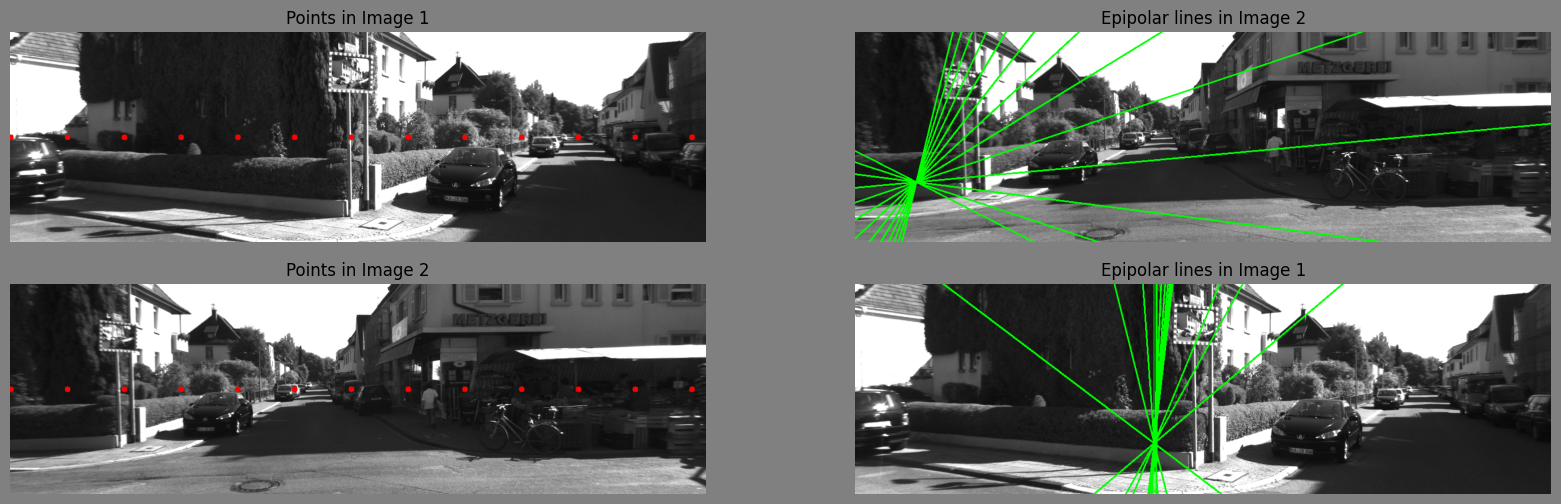

In [5]:
# Load the images
imageL = cv2.imread('./Question 2 and 3 Images/000023.png')
imageR = cv2.imread('./Question 2 and 3 Images/000000.png')

points_L,points_R,lines_L,lines_R = selectPointsAndfindEpipolarLines(
    imageL=imageL,imageR=imageR,
    F=F
)

plt = drawPointsAndEpipolarLines(
    pts_1=points_L[::5],
    pts_2=points_R[::5],
    imageL=imageL,lines_L=lines_L[::5],
    imageR=imageR,lines_R=lines_R[::5]
)

plt.show()